649
[3, 4, 5, 6, 7, 8, 9, 10, 117, 136, 137, 138, 139, 140, 141, 142, 143, 144, 401, 402, 476, 477, 608, 609, 619]


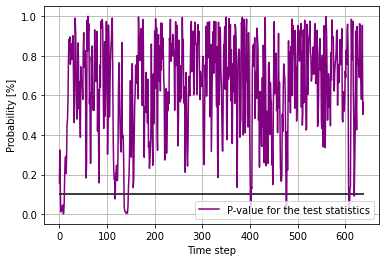

In [22]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

index = 0
lineIndex = 0
sampleNumber = 1947
positionSet = np.empty((sampleNumber,3))
file_object = open('E:/python-workspace/experiment1.txt', encoding = 'utf-8')
for line in file_object:
    if ((lineIndex % 5) == 2 or (lineIndex % 5) == 3 or (lineIndex % 5) == 4):
        #print(index)
        line = line.split(',')
        positionSet[(index,0)]=line[-3]
        positionSet[(index,1)]=line[-2]
        positionSet[(index,2)]=line[-1]
        index +=1
    lineIndex += 1
    
'''
for line in file_object:
    if ((lineIndex % 6) == 2 or (lineIndex % 6) == 4 or (lineIndex % 6) == 5):
        #print(index)
        line = line.split(',')
        positionSet[(index,0)]=line[-3]
        positionSet[(index,1)]=line[-2]
        positionSet[(index,2)]=line[-1]
        index +=1
    lineIndex += 1
'''   
    
testSet = pd.DataFrame(positionSet)
encoders = range(0, sampleNumber, 3)
localization = range(2, sampleNumber, 3)
encoderSet = pd.DataFrame(testSet, index = encoders)
encoderSet = encoderSet.reset_index()
localizationSet = pd.DataFrame(testSet, index = localization)
localizationSet = localizationSet.reset_index()
experimentNumber = localizationSet.shape[0]
print(experimentNumber)

def displacementGenerated(testDataFrame):
    tempList = []
    for i in range(1,experimentNumber):
        differenceValue = pow((testDataFrame[0][i] - testDataFrame[0][i-1]), 2) + pow((testDataFrame[1][i] - testDataFrame[1][i-1]), 2)
        tempList.append(math.sqrt(differenceValue))
    
    return tempList

encoderDisplacement = displacementGenerated(encoderSet)
localizationDisplacement = displacementGenerated(localizationSet)
difference = list(map(lambda x: x[0] - x[1], zip(encoderDisplacement, localizationDisplacement)))
differenceObj = pd.Series(difference)

def sampleAugmentedMean(testList, timestamp):
    meanList = []
    for i in range(timestamp,experimentNumber):
        preindex = i - timestamp
        #print(preindex)
        sample = testList[preindex:i]
        #print(sample)
        sampleMean = np.mean(sample)
        #print(sampleMean)
        meanList.append(sampleMean)
    
    return meanList

def pValueCompute(testList, timestamp):
    pvalueList = []
    for i in range(timestamp,experimentNumber):
        preindex = i - timestamp
        sample = testList[preindex:i]
        statisticalValue = stats.ttest_1samp(sample, 0, axis = 0, nan_policy='propagate', alternative ='two-sided')
        #print(statisticalValue)
        #print(statisticalValue.pvalue)
        p = statisticalValue.pvalue
        pvalueList.append(p)
    
    return pvalueList

def tTestCompute(testList, timestamp):
    tTestList = []
    for i in range(timestamp,experimentNumber):
        preindex = i - timestamp
        sample = testList[preindex:i]
        statisticalValue = stats.ttest_1samp(sample, 0, axis = 0, nan_policy='propagate', alternative ='two-sided')
        #print(statisticalValue)
        #print(statisticalValue.pvalue)
        t = statisticalValue.statistic
        tTestList.append(t)
    
    return tTestList

timestamp = 10
result2 = tTestCompute(difference, timestamp)
result3 = pValueCompute(difference, timestamp)

def faultDetector(testList, significanceLevel):
    criticalList = []
    for i in range(0,len(testList)):
        if (testList[i] < significanceLevel):
            criticalList.append(i)
    
    return criticalList

level = 0.1
criticalpointSet = faultDetector(result3, level)
print(criticalpointSet)

pObj = pd.Series(result3)
x = range(0, len(pObj))
plt.subplot(1, 1, 1)
z1=plt.plot(x,pObj, 'purple')
plt.title('')
plt.xlabel('Time step')
plt.ylabel('Probability [%]')
plt.grid(True)
plt.hlines(0.1, 0, len(pObj), colors = 'black')
plt.legend(['P-value for the test statistics'])